In [3]:
# ==========================================================
# Diplomado en Estadística Aplicada a la Toma de Decisiones con Lenguaje R y Python
# Universidad Privada Boliviana
# ----------------------------------------------------------
#   MODELOS PREDICTIVOS PARA LA TOMA DE DECISIONES ESTRATEGICAS
# ----------------------------------------------------------
#        Enrique Alejnadro Laurel Cossio, Septiembre 2024
# ==========================================================
#        Regresión Lineal Simple y Múltiple
# ==========================================================

In [2]:
# Cargamos Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm # modelo de regresion lineal
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

from sklearn.model_selection import train_test_split # train test

In [3]:
# cargamos datos
url='https://raw.githubusercontent.com/ealaurel/MODELOS_PREDICTIVOS/main/data/insurance.csv'
seguros = pd.read_csv(url,sep=',', encoding='iso-8859-1')

print(seguros.shape)
seguros.head(2)

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


Detalle de las variables
- age: Edad
- sex: sexo
- bmi: indices de masa corporal(para evaluar el riesgo de salud del asegurado)
- children: número de hijos
- smoker: fumador
- region: area donde habita
- chargues: costo del seguro



# 1. Exploración de datos

In [4]:
# Exploración de datos
# tipo de datos
seguros.dtypes


,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [5]:
seguros.bmi.describe()

,bmi
count,1338.000000
mean,30.663397
std,6.098187
min,15.960000
25%,26.296250
50%,30.400000
75%,34.693750
max,53.130000


In [6]:
# una copia de la fuente de datos
df = seguros.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# codificamos las variables
#df['sex'].replace({'male':0, 'female': 1}, inplace=True)
#df['smoker'].replace({'no':0, 'yes': 1}, inplace=True)
#df['region'].replace({'southwest':0, 'southeast': 1, 'northwest':2, 'northeast': 3}, inplace=True)

In [8]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


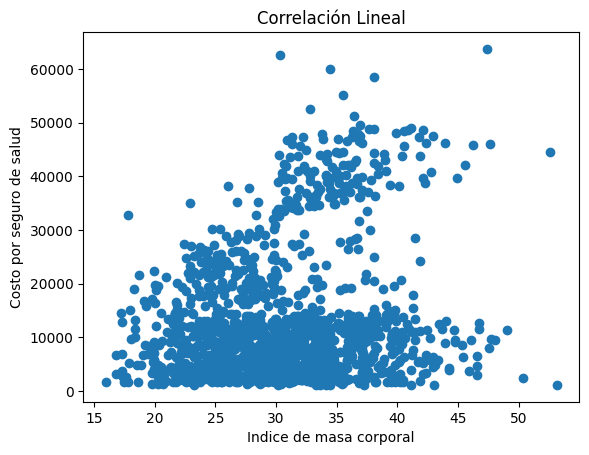

In [9]:
# grafico de dispersión
plt.scatter(df.bmi, df.charges)
plt.title('Correlación Lineal')
plt.xlabel('Indice de masa corporal')
plt.ylabel('Costo por seguro de salud')
plt.grid(False)

# 2. Modelo de Regresión

In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [12]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [13]:
# a dummies las avriables categoricas
df = pd.get_dummies(df, columns=['region'], drop_first=True)
print(df.shape)
df.head(2)

(1338, 9)


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,female,27.90,0,yes,16884.9240,False,False,True
1,18,male,33.77,1,no,1725.5523,False,True,False


In [14]:
# a dummies
df = pd.get_dummies(df, columns=['sex','smoker'], drop_first=True)
print(df.shape)
df.head(2)

(1338, 9)


,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,27.90,0,16884.9240,False,False,True,False,True
1,18,33.77,1,1725.5523,False,True,False,True,False


In [15]:
df.dtypes

,0
age,int64
bmi,float64
children,int64
charges,float64
region_northwest,bool
region_southeast,bool
region_southwest,bool
sex_male,bool
smoker_yes,bool


In [16]:
# variables dummies  a entero
df = df.replace({True: 1, False: 0})

In [17]:
# Definir las variables independientes y dependientes
X = df[['age', 'sex_male', 'bmi', 'children', 'smoker_yes', 'region_northwest','region_southeast','region_southwest']]
y = df['charges']

# Añadir una constante a las variables independientes
X = sm.add_constant(X)

In [18]:
# train - test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2) #Separamos 30% para test

In [19]:
# Ajustar el modelo de regresión lineal
modelo_OLS = sm.OLS(y_train, x_train).fit()

# Resumen del modelo
print(modelo_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     334.7
Date:                Wed, 18 Sep 2024   Prob (F-statistic):          3.10e-267
Time:                        23:02:38   Log-Likelihood:                -9471.2
No. Observations:                 936   AIC:                         1.896e+04
Df Residuals:                     927   BIC:                         1.900e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.158e+04   1189.204  

In [20]:
df_train = pd.concat([pd.DataFrame(x_train),pd.DataFrame(y_train)], axis = 1)
print(df_train.shape)
df_train.head(2)

(936, 10)


,const,age,sex_male,bmi,children,smoker_yes,region_northwest,region_southeast,region_southwest,charges
355,1.0,46,1,27.600,0,0,0,0,1,24603.04837
477,1.0,25,1,35.625,0,0,1,0,0,2534.39375


In [21]:
# Ajustando el modelo de regresion utilizando una formula:
resultados = smf.ols("charges ~ age + sex_male + bmi + children + smoker_yes + region_northwest + region_southeast + region_southwest", data=df_train).fit()

# Resultados
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     334.7
Date:                Wed, 18 Sep 2024   Prob (F-statistic):          3.10e-267
Time:                        23:02:45   Log-Likelihood:                -9471.2
No. Observations:                 936   AIC:                         1.896e+04
Df Residuals:                     927   BIC:                         1.900e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.158e+04   1189.204  

In [30]:
# Test de normalidad de residuos: Jarque-Bera
test = sms.jarque_bera(modelo_OLS.resid)
print(f'Estadígrafo Jarque-Bera (JB): {test[0]}')
print(f'p-value JB ~ chi^2(2): {test[1]}')
print(f'Sesgo: {test[2]}')
print(f'Curtosis: {test[3]}')
# Hipotesis Nula: Normalidad

Estadígrafo Jarque-Bera (JB): 447.84425995962573
p-value JB ~ chi^2(2): 5.647478337607258e-98
Sesgo: 1.2172476474725995
Curtosis: 5.357205721124188


In [31]:
# Test Homocedasticidad: Breusch–Pagan
test = sms.het_breuschpagan(modelo_OLS.resid, modelo_OLS.model.exog)
#print(f'Estadígrafo LMBP: {test[0]}')
#print(f'p-value LMBP ~ chi^2(k-1): {test[1]}')
print(f'Estadígrafo FBP: {test[2]}')
print(f'p-value FBP ~ F(k,n-k-1): {test[3]}')
# Hipotesis Nula: Homocedasticidad

Estadígrafo LMBP: 70.78370191525414
p-value LMBP ~ chi^2(k-1): 3.4306487647816947e-12
Estadígrafo FBP: 9.479781503869333
p-value FBP ~ F(k,n-k-1): 1.167415442863648e-12


In [35]:
# Correlacion de los errores: Test de Durbin-Watson
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import norm
dw_stat = durbin_watson(modelo_OLS.resid)
print(f'Estadística de Durbin-Watson: {dw_stat}')
# Interpretación basada en valores críticos (asumiendo un nivel de significancia de 0.05)
# Nota: Los valores críticos dL y dU dependen de n y k
dL = 0.6 # Valor crítico inferior
dU = 1.4  # Valor crítico superior
if dw_stat < dL:
    print("Evidencia de autocorrelación positiva de primer orden")
elif dL <= dw_stat <= dU:
    print("Prueba inconclusa.")
else:
    print("No hay evidencia de autocorrelación positiva.")

Estadística de Durbin-Watson: 2.0439693579427605
No hay evidencia de autocorrelación positiva.


In [37]:
# *** Evaluando multicolinealidad: VIF ***
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


#VIF ≥ 10: multicolinealidad severa
#VIF ≥ 5: multicolinealidad elevada
#VIF < 5: multicolinealidad débil a moderad
print(vif_data)

           Variable        VIF
0             const  35.527488
1               age   1.016822
2          sex_male   1.008900
3               bmi   1.106630
4          children   1.004011
5        smoker_yes   1.012074
6  region_northwest   1.518823
7  region_southeast   1.652230
8  region_southwest   1.529411


In [ ]:
# Ajustando el modelo de regresion utilizando una formula y transformación en la variable respuesta:
resultados = smf.ols("np.log(charges) ~ age + sex_male + bmi + children + smoker_yes + region_northwest + region_southeast + region_southwest", data=df_train).fit()

# Resultados
print(resultados.summary())